In [1]:
# Bibliotecas
import sys, numpy as np, matplotlib.pyplot as plt, plotly.graph_objects as go, pandas as pd
sys.path.append('../ppgsi_mdp_risk')

from ppgsi_mdp_risk.function import FunctionFactory
from ppgsi_mdp_risk.curves import EquivalentCostCurve
from ppgsi_mdp_risk.graph import CurvePlots
from ppgsi_mdp_risk.processing import BuildCurve

%load_ext autoreload
%autoreload 2

# MDP Simples

As seguintes metodologias foram aplicadas neste ambiente:

|Metodologia|Descritivo|
|--|--|
|Exponential Utility Function||
|Piecewise-Linear||
|Polynomial Utility Function||
|VaR (Value at Risk)||
|CVaR (Conditional Value at Risk)||



## Configurações

In [2]:
# Parametros
nm_exponential_function = 'ExponentialFunction'
nm_pwl_function = 'PiecewiseTransformation'
nm_polynomial_function = 'PolynomialFunction'
nm_var_method = 'VAR'
nm_cvar_method = 'ConditionalVAR'
_quiet = True

# Objetos ---------------------------
# -----------------------------------

# Funções
_ff = FunctionFactory.FunctionFactory()
_exp = _ff.get_function(nm_exponential_function)
_pwl = _ff.get_function(nm_pwl_function)
_poly = _ff.get_function(nm_polynomial_function)
_var = _ff.get_function(nm_var_method)
_cvar = _ff.get_function(nm_cvar_method)

# Cria dicionario de objetos para Calculo
_ecc = {}
_ecc[nm_exponential_function] = EquivalentCostCurve.EquivalentCostCurve(_exp, nm_exponential_function, rini_p=0.05, rend_p=1, step_p=0.05)
_ecc[nm_pwl_function] = EquivalentCostCurve.EquivalentCostCurve(_pwl, nm_pwl_function, rini_p=0.05, rend_p=1, step_p=0.05)
_ecc[nm_polynomial_function] = EquivalentCostCurve.EquivalentCostCurve(_poly, nm_polynomial_function, rini_p=0.05, rend_p=1, step_p=0.05)
_ecc[nm_var_method] = EquivalentCostCurve.EquivalentCostCurve(_var, nm_var_method, rini_p=0.05, rend_p=1, step_p=0.05)
_ecc[nm_cvar_method] = EquivalentCostCurve.EquivalentCostCurve(_cvar, nm_cvar_method, rini_p=0.05, rend_p=1, step_p=0.05)

# Plots
_cp = CurvePlots.CurvePlots(lib='matplotlib')
_bc = BuildCurve.BuildCurve(_cp)

# Parametros Especificos
c, p = 1, 0.5
list_p = np.arange(0.1, 1, 0.1)

# Calculo Lambda Extreme
lambda_extreme = _exp._get_lambda_extreme(p, c)

list_lambdas_pos = np.arange(0.1, lambda_extreme, 0.001)
list_lambdas_neg = np.arange(-100, -0.1, 0.1)

list_k_pos = np.arange(0.9, 1, 0.00001)
list_k_neg = np.arange(-1, -0.9, 0.00001)

list_betas_pos = np.arange(1, 60, 0.1)
list_betas_neg = np.arange(1/10**5, 0.1, 0.001)

list_betas = [1/10**9, 0.1, 1, 2, 3, 10, 20, 50]

In [3]:
_empirical_result = {}
_multi_empirical_result = {}

_analytical_result = {}
_multi_analytical_result = {}

## Exponential Utility Function

$$
V(s) = \frac{-e^{\lambda c} \times p}{(1 - e^{\lambda c} \times (1-p))}
$$

### Análise Empírica

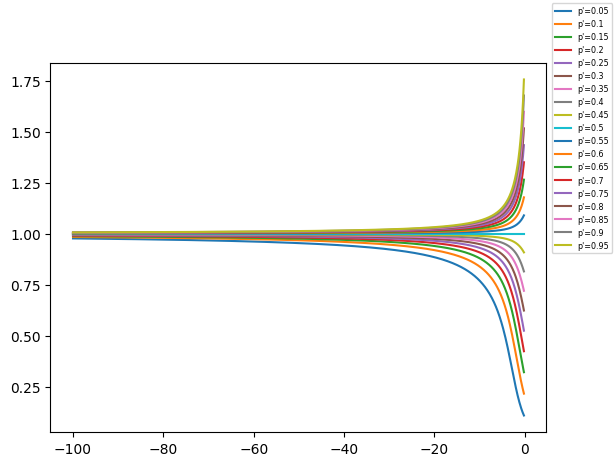

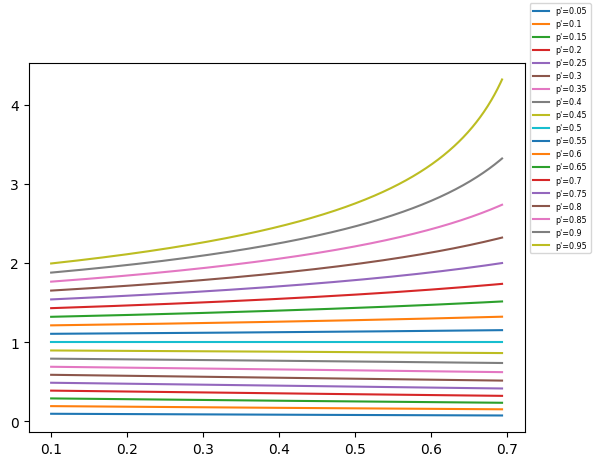

In [12]:
res_neg, res_pos, df_min, df_max, c_min, c_max = \
    _bc.build_curves_empirical(
        c=c,
        p=p,
        nm_function=nm_exponential_function,
        _ecc=_ecc[nm_exponential_function],
        list_neg=list_lambdas_neg,
        list_pos=list_lambdas_pos
    )

_empirical_result['EXP-min'] = c_min.copy()
_empirical_result['EXP-max'] = c_max.copy()

C:\Users\Miyamura\Desktop\GIT_MESTRADO\ppgsi_comparable_mdp_risk\notebooks\../ppgsi_mdp_risk\ppgsi_mdp_risk\function\ExponentialFunction.py:23: RuntimeWarning: invalid value encountered in log
  return np.log(v1/v2) * 1/l


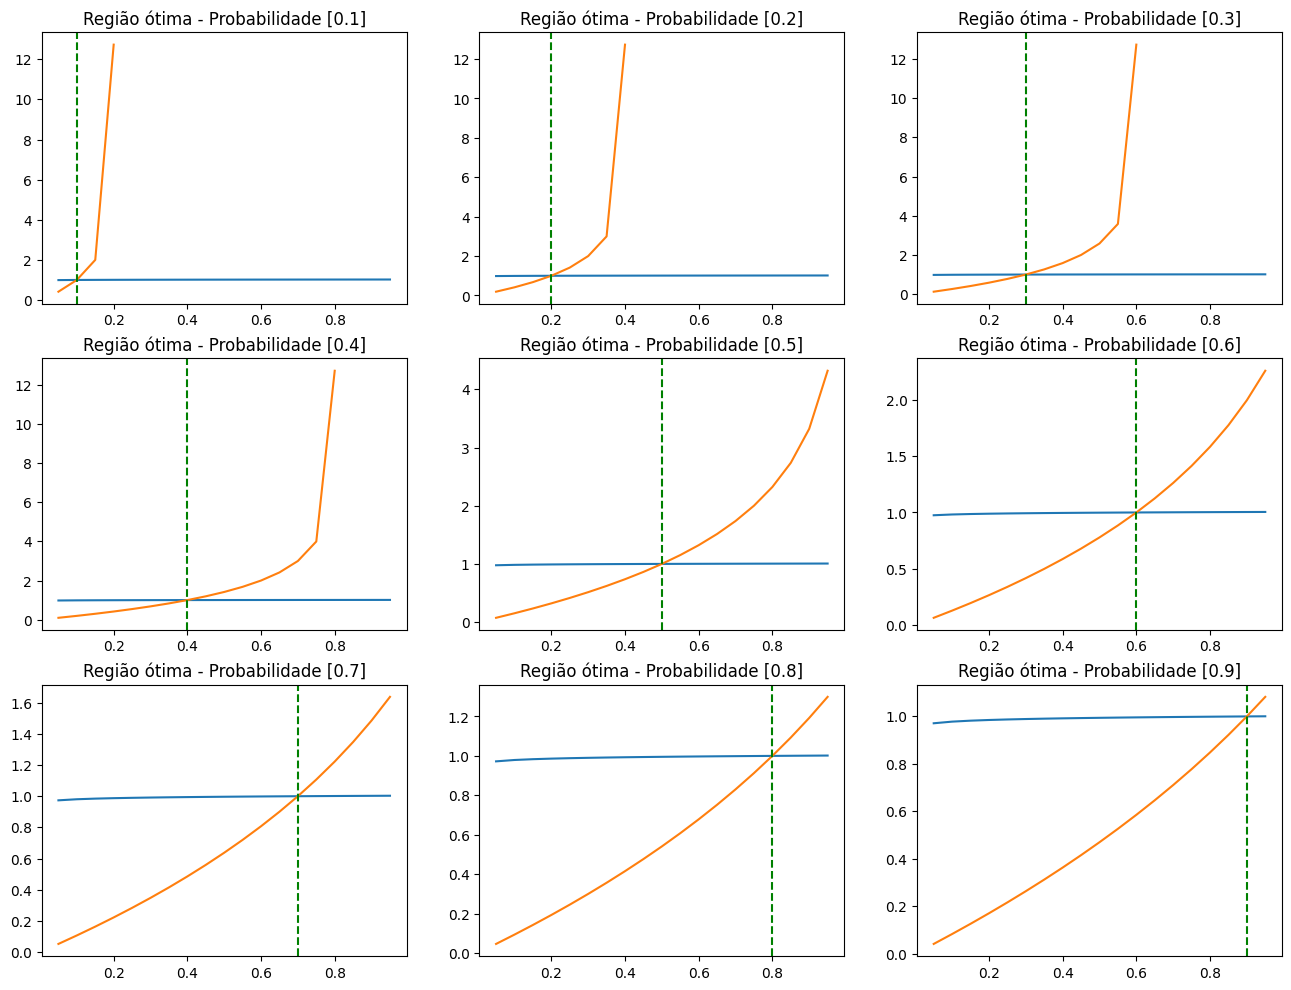

In [13]:
dict_curves = \
    _bc.build_curves_empirical_multiple_prob(
        c=c,
        list_p=list_p,
        nm_function=nm_exponential_function,
        _ecc=_ecc[nm_exponential_function],
        list_neg=list_lambdas_neg,
        list_pos=list_lambdas_pos
    )

_multi_empirical_result['EXP'] = dict_curves.copy()

### Formalização dos Limites

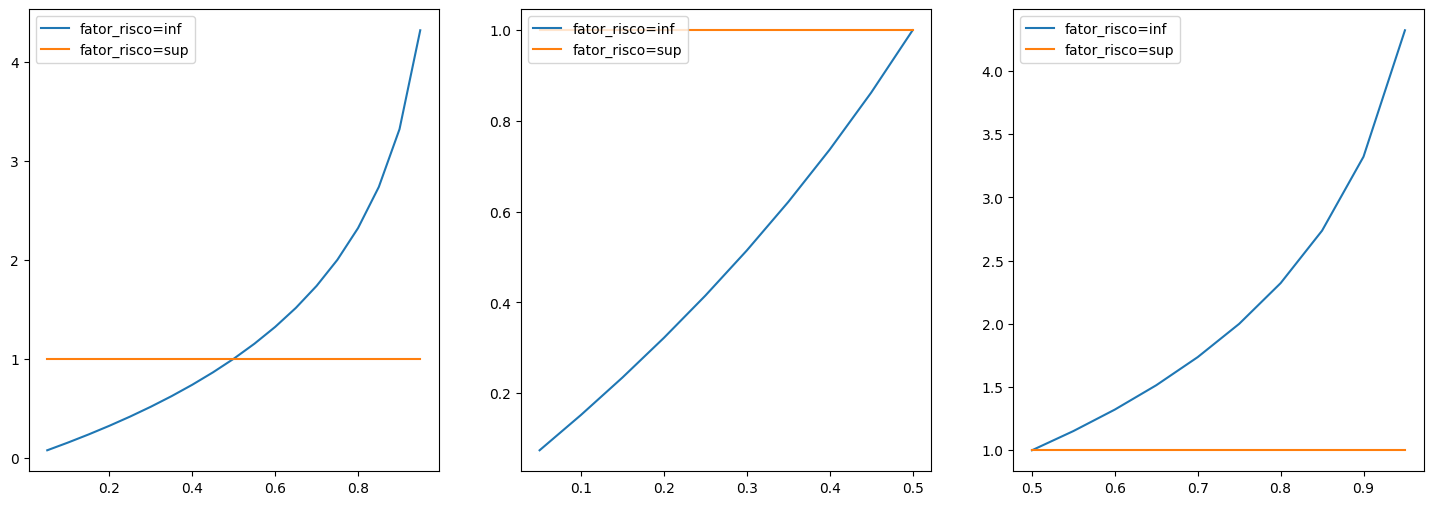

In [10]:
# Cria dicionario de curvas
df_curves = _bc.build_curves_from_limits(
    c=c,
    p=p,
    nm_function=nm_exponential_function,
    _ecc=_ecc[nm_exponential_function]
)

_analytical_result['EXP'] = df_curves.copy()

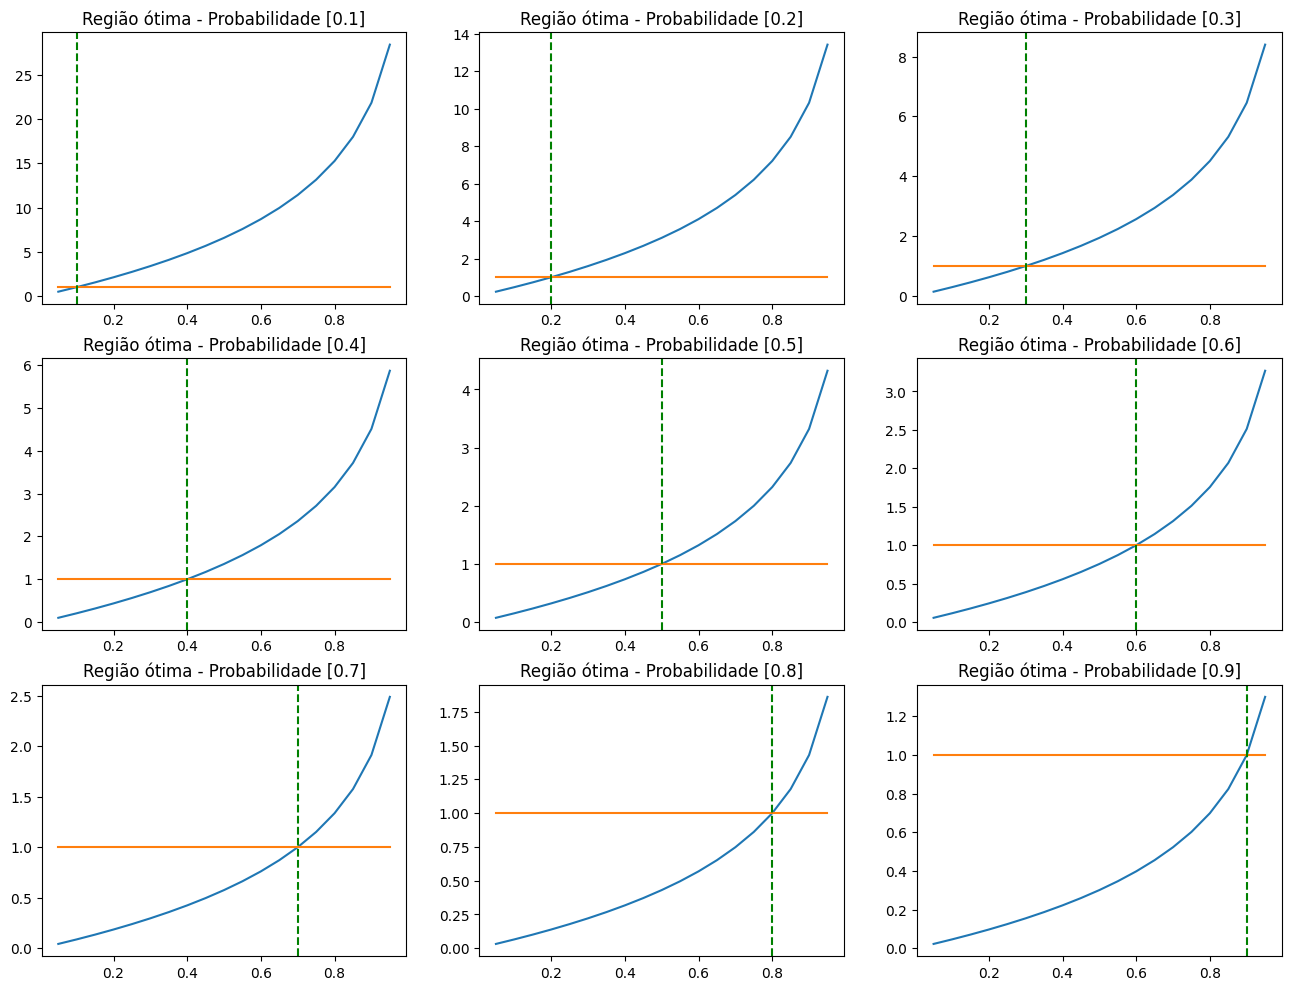

In [16]:
# Cria dicionario de curvas
df_curves = _bc.build_curves_from_limits_multiple_prob(
    c=c,
    list_p=list_p,
    nm_function=nm_exponential_function,
    _ecc=_ecc[nm_exponential_function]
)

_multi_analytical_result['EXP'] = df_curves.copy()

## Piecewise-Linear Transformation

$$
V(s) = \frac{c \times (2kp - k + 1)}{(\gamma - 1) \times (k + p - 1) + p - \gamma kp}
$$

In [ ]:
# Limite Empirico Minimo
dict_curves_pwl = {}
min_lambda = np.min(list_k_neg)

for k in list_k_neg:
    alpha = _pwl._get_alpha(k)
    gamma = 1
    dict_curves_pwl[k] = _ecc[nm_pwl_function].get_empirical_limit_curve(
        c=c,
        p=p,
        k=k,
        gamma=gamma,
        alpha=alpha
    )

df_min_pwl = pd.DataFrame(dict_curves_pwl)
c_min_pwl = df_min_pwl[min_lambda]

_cp.plot_curve_from_dataframe(
    df=df_min_pwl,
    label='p\'',
    transpose=True
)

# Limite Empirico max
dict_curves_pwl = {}
max_lambda = np.max(list_k_pos)

for k in list_k_pos:
    alpha = _pwl._get_alpha(k)
    gamma = 1
    dict_curves_pwl[k] = _ecc[nm_pwl_function].get_empirical_limit_curve(
        c=c,
        p=p,
        k=k,
        gamma=gamma,
        alpha=alpha
    )

df_max_pwl = pd.DataFrame(dict_curves_pwl)
c_min_pwl = df_max_pwl[max_lambda]

_cp.plot_curve_from_dataframe(
    df=df_max_pwl,
    label='p\'',
    transpose=True
)

In [ ]:
dict_curves = {}

min_max_k = [min(list_k_neg), max(list_k_pos)]

for k in min_max_k:
    if not _quiet: print(f'Processando k={k}')
    alpha = _pwl._get_alpha(k)
    gamma = 1
    dict_curves[k] = _ecc[nm_pwl_function].get_multi_empirical_limit_curve(c, list_p, k=k, gamma=gamma, alpha=alpha)

_cp.plot_curve_subplots_multiple_probabilities(dict_curves, list_p) 

### Formalização dos Limites

In [ ]:
# Cria dicionario de curvas
dict_curves = {}
limites = ['inf', 'sup']

# Processa para uma lista de betas
for lim in limites:
    if not _quiet: print(f'Processando lim={lim}')
    dict_curves[lim] = _ecc[nm_pwl_function].get_limit_curve(c, p, lim=lim)

# Cria dataframe com resultados
df_curves_poly = pd.DataFrame(dict_curves)

# Realiza plot de cada lim
_cp.plot_curve_subplots(
    dict_curves=dict_curves,
    filter_prob=0.5
)

In [ ]:
dict_curves = {}

limites = ['inf', 'sup']

for lim in limites:
    if not _quiet: print(f'Processando limite={beta}')
    dict_curves[lim] = _ecc[nm_pwl_function].get_multi_limit_curve(c, list_p, lim=lim)

_cp.plot_curve_subplots_multiple_probabilities(dict_curves, list_p) 

## Polynomial Utility Function

$$
V(s) = 
$$

In [ ]:
# Cria dicionario de curvas
dict_curves_poly = {}

# Processa para uma lista de betas
for beta in list_betas:
    if not _quiet: print(f'Processando beta={beta}')
    dict_curves_poly[beta] = _ecc[nm_polynomial_function].get_empirical_limit_curve(c, p, beta=beta, th=0.01)

# Cria dataframe com resultados
df_curves_poly = pd.DataFrame(dict_curves_poly)

# Realiza plot de cada beta
_cp.plot_curve_subplots(
    dict_curves=dict_curves_poly,
    filter_prob=0.5
)

In [ ]:
# Limite Empirico Minimo
dict_poly = {}
min_beta = np.min(list_betas_neg)

for beta in list_betas_neg:
    dict_poly[beta] = _ecc[nm_polynomial_function].get_empirical_limit_curve(
        c=c,
        p=p,
        beta=beta,
        th=0.01
    )

df_min_poly = pd.DataFrame(dict_poly)
c_min_poly = df_min_poly[min_beta]

_cp.plot_curve_from_dataframe(
    df=df_min_poly,
    label='p\'',
    transpose=True
)

# Limite Empirico max
dict_poly = {}
max_beta = np.max(list_betas_pos)

for beta in list_betas_pos:
    dict_poly[beta] = _ecc[nm_polynomial_function].get_empirical_limit_curve(
        c=c,
        p=p,
        beta=beta,
        th=0.01
    )

df_max_poly = pd.DataFrame(dict_poly)
c_max_poly = df_max_poly[max_beta]

_cp.plot_curve_from_dataframe(
    df=df_max_poly,
    label='p\'',
    transpose=True
)

In [ ]:
c = 1
list_p = np.arange(0.1, 1, 0.1)
dict_curves = {}

min_max_beta = [min(list_betas), max(list_betas)]

for beta in min_max_beta:
    if not _quiet: print(f'Processando beta={beta}')
    dict_curves[beta] = _ecc[nm_polynomial_function].get_multi_empirical_limit_curve(c, list_p, beta=beta, th=0.01)

_cp.plot_curve_subplots_multiple_probabilities(dict_curves, list_p) 

### Formalização dos Limites

## VaR (Value at Risk)

In [ ]:
# 1. Take input of 'a','r' and 'n'
a = 1
r = 0.25
n = 10
 
if(r>1):
  S_n = (a*(r**n))/(r-1)
else:
  S_n = (a*(r**n))/(1-r)
 
print("Sum of n terms: ",S_n)

In [ ]:
Sn = 1.2715657552083333e-06
a = 1
r = 0.25

n = np.log((Sn * (1 - r)) / a) / np.log(r)
print(f"1: {np.log((Sn * (1 - r)) / a)} | 2: {np.log(r)}")
print(f"Number of terms: {n}")

In [ ]:
# Cria dicionario de curvas
dict_curves = {}
list_alphas = [0.9, 0.95, 0.99, 0.995]

# Processa para uma lista de betas
for alpha in list_alphas:
    if not _quiet: print(f'Processando alpha={alpha}')
    dict_curves[alpha] = _ecc[nm_var_method].get_empirical_limit_curve(c, p, alpha=alpha, continuous=False)

# Cria dataframe com resultados
df_curves = pd.DataFrame(dict_curves)

# Realiza plot de cada alpha
_cp.plot_curve_subplots(
    dict_curves=dict_curves,
    filter_prob=0.5
)

In [ ]:
# Cria dicionario de curvas
dict_curves = {}
list_alphas = [0.9, 0.95, 0.99, 0.995]

# Processa para uma lista de betas
for alpha in list_alphas:
    if not _quiet: print(f'Processando alpha={alpha}')
    dict_curves[alpha] = _ecc[nm_var_method].get_empirical_limit_curve(c, p, alpha=alpha, continuous=True, timestep=0.001)

# Cria dataframe com resultados
df_curves = pd.DataFrame(dict_curves)

# Realiza plot de cada alpha
_cp.plot_curve_subplots(
    dict_curves=dict_curves,
    filter_prob=0.5
)

In [ ]:
# Cria dicionario de curvas
dict_curves = {}
list_alphas = [0.5, 0.9, 0.95, 0.99, 0.995]

# Processa para uma lista de betas
for alpha in list_alphas:
    if not _quiet: print(f'Processando alpha={alpha}')
    dict_curves[alpha] = _ecc[nm_var_method].get_limit_curve(c, p, alpha=alpha, continuous=True)

# Cria dataframe com resultados
df_curves = pd.DataFrame(dict_curves)

# Realiza plot de cada alpha
_cp.plot_curve_subplots(
    dict_curves=dict_curves,
    filter_prob=0.5
)

## CVaR (Conditional Value at Risk)

In [ ]:
# Cria dicionario de curvas
dict_curves = {}
list_alphas = [0.9, 0.95, 0.99, 0.995]

# Processa para uma lista de betas
for alpha in list_alphas:
    if not _quiet: print(f'Processando alpha={alpha}')
    dict_curves[alpha] = _ecc[nm_var_method].get_empirical_limit_curve(c, p, alpha=alpha, continuous=False)

# Cria dataframe com resultados
df_curves = pd.DataFrame(dict_curves)

# Realiza plot de cada alpha
_cp.plot_curve_subplots(
    dict_curves=dict_curves,
    filter_prob=0.5
)